## 探索电影数据集

在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)



数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


**请注意，你需要提交该报告导出的 `.html`、`.ipynb` 以及 `.py` 文件。**



---

---

## 第一节 数据的导入与处理

在这一部分，你需要编写代码，使用 Pandas 读取数据，并进行预处理。


**任务1.1：** 导入库以及数据

1. 载入需要的库 `NumPy`、`Pandas`、`matplotlib`、`seaborn`。
2. 利用 `Pandas` 库，读取 `tmdb-movies.csv` 中的数据，保存为 `movie_data`。

提示：记得使用 notebook 中的魔法指令 `%matplotlib inline`，否则会导致你接下来无法打印出图像。

In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
movie_data = pd.read_csv('tmdb-movies.csv')
movie_data.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


---

**任务1.2: ** 了解数据

你会接触到各种各样的数据表，因此在读取之后，我们有必要通过一些简单的方法，来了解我们数据表是什么样子的。

1. 获取数据表的行列，并打印。
2. 使用 `.head()`、`.tail()`、`.sample()` 方法，观察、了解数据表的情况。
3. 使用 `.dtypes` 属性，来查看各列数据的数据类型。
4. 使用 `isnull()` 配合 `.any()` 等方法，来查看各列是否存在空值。
5. 使用 `.describe()` 方法，看看数据表中数值型的数据是怎么分布的。



In [63]:
movie_data.tail()
movie_data.sample()
movie_data.info()
movie_data.isnull().any()
movie_data.isna().any()
movie_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


---

**任务1.3: ** 清理数据

在真实的工作场景中，数据处理往往是最为费时费力的环节。但是幸运的是，我们提供给大家的 tmdb 数据集非常的「干净」，不需要大家做特别多的数据清洗以及处理工作。在这一步中，你的核心的工作主要是对数据表中的空值进行处理。你可以使用 `.fillna()` 来填补空值，当然也可以使用 `.dropna()` 来丢弃数据表中包含空值的某些行或者列。

任务：使用适当的方法来清理空值，并将得到的数据保存。

In [64]:
# 丢弃homepage列，因为该列对分析数据并不重要
movie_data.drop(['homepage'],axis=1,inplace=True)

In [65]:
# tagline,keywords,production_companies，因为该列对分析数据并不重要
movie_data.drop(['tagline','keywords','production_companies'],axis=1,inplace=True)
movie_data.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [66]:
# 丢弃重复列
sum(movie_data.duplicated())
# 丢弃重复
movie_data.drop_duplicates(inplace=True)
# 再次检查数据中的重复，确认修改
sum(movie_data.duplicated())

0

In [67]:
# 丢弃其他的空行
movie_data.dropna(inplace=True)
movie_data.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

---

---

## 第二节 根据指定要求读取数据


相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。



---

**任务2.1: ** 简单读取

1. 读取数据表中名为 `id`、`popularity`、`budget`、`runtime`、`vote_average` 列的数据。
2. 读取数据表中前1～20行以及48、49行的数据。
3. 读取数据表中第50～60行的 `popularity` 那一列的数据。

要求：每一个语句只能用一行代码实现。

In [68]:
movie_data[['id','popularity','budget','runtime','vote_average']]
movie_data.iloc[np.r_[0:20,47,48],:]
movie_data.iloc[49:60,:]['popularity']

49    2.885126
50    2.883233
51    2.814802
52    2.798017
53    2.793297
54    2.614499
55    2.584264
56    2.578919
57    2.575711
58    2.557859
59    2.550747
Name: popularity, dtype: float64

---

**任务2.2: **逻辑读取（Logical Indexing）

1. 读取数据表中 **`popularity` 大于5** 的所有数据。
2. 读取数据表中 **`popularity` 大于5** 的所有数据且**发行年份在1996年之后**的所有数据。

提示：Pandas 中的逻辑运算符如 `&`、`|`，分别代表`且`以及`或`。

要求：请使用 Logical Indexing实现。

In [69]:
mask_gt_5 = movie_data['popularity'] > 5
movie_data_pop_gt_5 = movie_data[mask_gt_5]
movie_data_pop_gt_5.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [70]:
mask_gt_5_after_1996 = (movie_data['release_year'] >1996) & (movie_data['popularity'] > 5)
movie_data_pop_gt_5_after_1996 = movie_data.loc[mask_gt_5_after_1996]
movie_data_pop_gt_5_after_1996.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


---

**任务2.3: **分组读取

1. 对 `release_year` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `revenue` 的均值。
2. 对 `director` 进行分组，使用 [`.agg`](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html) 获得 `popularity` 的均值，从高到低排列。

要求：使用 `Groupby` 命令实现。

In [71]:
movie_data.groupby('release_year').agg('mean')['revenue']
movie_data.groupby('director').agg('mean')['popularity'].sort_values(ascending=False)

director
Colin Trevorrow                16.696886
Joe Russo|Anthony Russo        12.971027
Chad Stahelski|David Leitch    11.422751
Don Hall|Chris Williams         8.691294
Juno John Lee                   8.411577
                                 ...    
Nacho G. Velilla                0.001317
Jean-Xavier de Lestrade         0.001315
Zana Briski|Ross Kauffman       0.001117
Dibakar Banerjee                0.001115
Pascal Thomas                   0.000973
Name: popularity, Length: 5014, dtype: float64

---

---

## 第三节 绘图与可视化

接着你要尝试对你的数据进行图像的绘制以及可视化。这一节最重要的是，你能够选择合适的图像，对特定的可视化目标进行可视化。所谓可视化的目标，是你希望从可视化的过程中，观察到怎样的信息以及变化。例如，观察票房随着时间的变化、哪个导演最受欢迎等。

<table>
<thead><tr><th>可视化的目标</th><th>可以使用的图像</th></tr></thead><tbody>
 <tr><td>表示某一属性数据的分布</td><td>饼图、直方图、散点图</td></tr>
 <tr><td>表示某一属性数据随着某一个变量变化</td><td>条形图、折线图、热力图</td></tr>
 <tr><td>比较多个属性的数据之间的关系</td><td>散点图、小提琴图、堆积条形图、堆积折线图</td></tr>
</tbody></table>

在这个部分，你需要根据题目中问题，选择适当的可视化图像进行绘制，并进行相应的分析。对于选做题，他们具有一定的难度，你可以尝试挑战一下～

**任务3.1：**对 `popularity` 最高的20名电影绘制其 `popularity` 值。

In [72]:
# 选取popularity最高的20名电影
top_20_pop=movie_data.sort_values('popularity',ascending=False)[:20]

Text(0, 0.5, 'popularity')

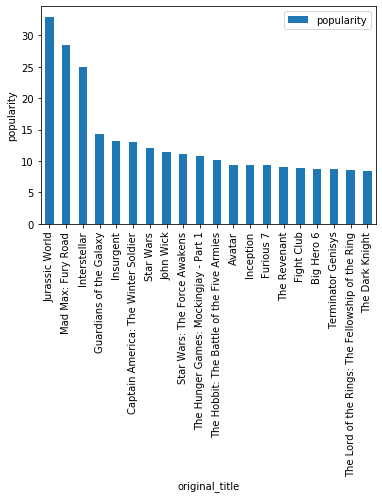

In [73]:
# 条形图
top_20_pop.plot.bar(x='original_title',y='popularity');
plt.xlabel('original_title')
plt.ylabel('popularity')

---

在受欢迎程度上，有三部电影遥遥领先于其他电影。这三部电影是：Jurassic World（侏罗纪公园）, 
Mad Max: Fury Road（疯狂的麦克斯：狂暴之路）和Intersteller (星际穿越)。
其他电影的受欢迎程度在伯仲之间。

---
**任务3.2：**分析电影净利润（票房-成本）随着年份变化的情况，并简单进行分析。

In [74]:
# 净利润=票房-成本
interest = movie_data['revenue'] - movie_data['budget']
movie_data['interest'] = interest
movie_data['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

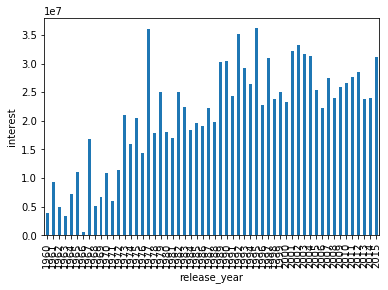

In [75]:
mean_interest = movie_data.groupby('release_year').mean()['interest']
mean_interest.plot.bar(x='release_year',y='interest');
plt.xlabel('release_year');
plt.ylabel('interest');

从图中可以看出，从1960年代开始，电影净利润逐步上升，到1990年代达到顶峰，随后略有下降。

---

**[选做]任务3.3：**选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况，并简要进行分析。

In [76]:
## 拆分导演, 原来数据中单部电影多名导演是用’|’隔开的
tmp=movie_data['director'].str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('director')
movie_data_split = movie_data[['original_title', 'revenue_adj']].join(tmp)
movie_data_split
target_data = movie_data_split

## TODO:  整理target_data,  它有上面提到的三个维度
# 选择最多产的10位导演（电影数量最多的）
# 选择最多产的10位导演（电影数量最多的）
top_10_director = target_data['director'].value_counts().head(10)
top_10_director_names = top_10_director.index

Index(['Woody Allen', 'Clint Eastwood', 'Martin Scorsese', 'Steven Spielberg',
       'Ridley Scott', 'Steven Soderbergh', 'Ron Howard', 'Joel Schumacher',
       'Brian De Palma', 'Francis Ford Coppola'],
      dtype='object')

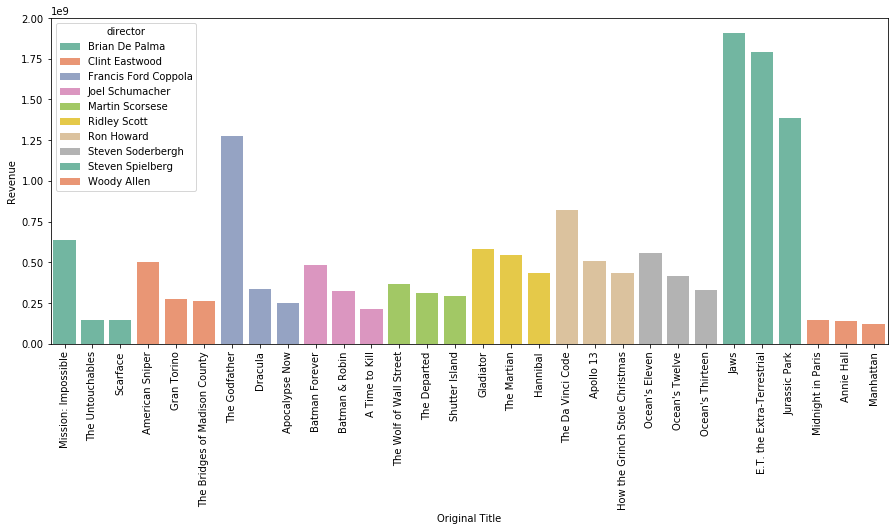

In [77]:
# 绘制他们排行前3的三部电影的票房情况
top_10_director_names_full_data = movie_data[movie_data['director'].isin(top_10_director_names)]

def get_top3(subf):
    top3 = subf.sort_values(by='revenue_adj', ascending=False)[:3]
    return top3

top3_top10 = top_10_director_names_full_data.groupby('director').apply(get_top3)

target_data = top3_top10[['original_title','revenue_adj','director']]
## 作图, 将导演设为颜色维度hue, 达到分别作图的效果
fig = plt.figure(figsize=(15, 6)) 
ax = sb.barplot(data=target_data, x='original_title', y='revenue_adj', hue='director', dodge=False, palette="Set2")
plt.xticks(rotation = 90)
plt.ylabel('Revenue');
plt.xlabel('Original Title');

对于最多产的10位导演，研究他们排行前3的三部电影的票房情况，发现：
1. 有的导演的电影票房变化较小，如Steven Spielberg的电影票房都较高，而Woody Allen的电影票房都相对较低。
2. 有的导演的电影票房变化较大，如Ron Howard和Brian De Palma。

---

**[选做]任务3.4：**分析1968年~2015年六月电影的数量的变化。

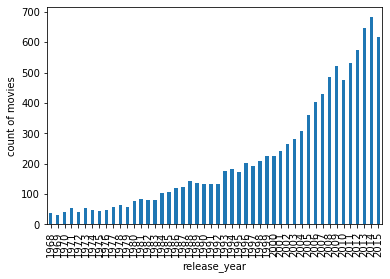

In [78]:
mask_1968_to_2015 = (movie_data['release_year'] >= 1968) & (movie_data['release_year'] <= 2015)
movie_data_1968_to_2015 = movie_data.loc[mask_1968_to_2015].sort_values('release_year')
movie_counts = movie_data_1968_to_2015['release_year'].value_counts()
movie_counts.sort_index().plot(kind='bar');
plt.xlabel('release_year');
plt.ylabel('count of movies');

从总体上来说，1968年~2015年六月电影的数量呈现逐年递增趋势。

---

**[选做]任务3.5：**分析1968年~2015年六月电影 `Comedy` 和 `Drama` 两类电影的数量的变化。

In [79]:
#1968年~2015年电影
movie_data_1968_to_2015.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,interest
9754,18193,tt0063049,0.188511,0,0,Head,Peter Tork|Davy Jones|Micky Dolenz|Michael Nes...,Bob Rafelson,"The Monkees are tossed about in a psychedelic,...",86,Comedy|Fantasy,11/6/68,12,5.5,1968,0.0,0.0,0


In [80]:
# change data type of 'release_date'
movie_data_1968_to_2015['release_date'] = pd.to_datetime(movie_data_1968_to_2015['release_date'])


In [81]:
# get entries with month==6
june_mask = movie_data_1968_to_2015['release_date'].dt.month == 6
movie_data_1968_to_2015_june = movie_data_1968_to_2015[june_mask]
movie_data_1968_to_2015_june.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,interest
9733,912,tt0063688,0.488336,4300000,0,The Thomas Crown Affair,Steve McQueen|Faye Dunaway|Paul Burke|Jack Wes...,Norman Jewison,The young businessman Thomas Crown is bored an...,102,Romance|Crime|Thriller|Drama,2068-06-19,42,7.0,1968,2.695654e+07,0.0,-4300000


In [82]:
# outer join on release_year
comedy = movie_data_1968_to_2015_june[movie_data_1968_to_2015_june['genres'].str.contains('Comedy')][['release_year','genres']].groupby('release_year').count()
comedy.rename(columns={'genres':'Comedy'},inplace = True)

drama = movie_data_1968_to_2015_june[movie_data_1968_to_2015_june['genres'].str.contains('Drama')][['release_year','genres']].groupby('release_year').count()
drama.rename(columns={'genres':'Drama'}, inplace=True)

result = pd.merge(comedy, drama, how='outer',on='release_year')

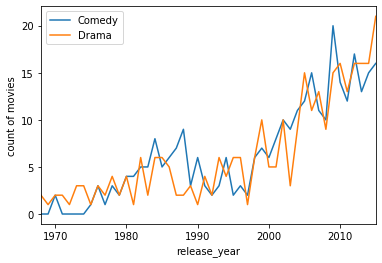

In [83]:
# change 
result.fillna(0, inplace=True)
result.sort_index().plot();
plt.xlabel('release_year');
plt.ylabel('count of movies');

总体来说，1968年~2015年六月，Comedy类和Drama类的电影数量呈上升趋势。在上世纪90年代末期更是数量猛增，之前增长并不明显。

> 注意: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)、Python (.py)** 把导出的 HTML、python文件 和这个 iPython notebook 一起提交给审阅者。